In [1]:
#imports
import pandas as pd #Python data analysis library
import numpy as np #Python scientific computing
import matplotlib.pyplot as plt #For plotting
import matplotlib.mlab as mlab
import seaborn as sns #Python visualization library
from scipy.optimize import curve_fit
from IPython.display import display, HTML

#Plots inline
%matplotlib inline

In [18]:
#import dataset
orders = pd.read_csv("C:/Users/shiv/MARKET BASKET ANALYSIS/Data/orders.csv")
products = pd.read_csv("C:/Users/shiv/MARKET BASKET ANALYSIS/Data/products.csv")
aisles = pd.read_csv("C:/Users/shiv/MARKET BASKET ANALYSIS/Data/aisles.csv")
departments = pd.read_csv("C:/Users/shiv/MARKET BASKET ANALYSIS/Data/departments.csv")
trainDf = pd.read_csv("C:/Users/shiv/MARKET BASKET ANALYSIS/Data/order_products__train.csv")





C:/Users/shiv/MARKET BASKET ANALYSIS/Data

In [19]:
trainDf.info()
#trainDf['add_to_cart_order'].value_counts()
#trainDf['product_id'].isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 4 columns):
order_id             99999 non-null int64
product_id           99999 non-null int64
add_to_cart_order    99999 non-null int64
reordered            99999 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [20]:
#orders.info()
orders.isnull().sum()

order_id                     0
user_id                      0
eval_set                     0
order_number                 0
order_dow                    0
order_hour_of_day            0
days_since_prior_order    6045
dtype: int64

In [21]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [22]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [23]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [24]:
products= pd.merge(aisles,products,on="aisle_id")
products.head()

,aisle_id,aisle,product_id,product_name,department_id
0,1,prepared soups salads,209,Italian Pasta Salad,20
1,1,prepared soups salads,554,Turkey Chili,20
2,1,prepared soups salads,886,Whole Grain Salad with Roasted Pecans & Mango ...,20
3,1,prepared soups salads,1600,Mediterranean Orzo Salad,20
4,1,prepared soups salads,2539,Original Potato Salad,20


In [26]:
products=pd.merge(departments,products,on="department_id")
products.head()

,department_id,department,aisle_id,aisle,product_id,product_name
0,1,frozen,34,frozen meat seafood,118,Ground Turkey Chub
1,1,frozen,34,frozen meat seafood,383,Breaded Chicken Breast Tenders
2,1,frozen,34,frozen meat seafood,402,100% Pure Beef Homestyle Patties
3,1,frozen,34,frozen meat seafood,625,"Chicken Breast Nuggets, Dinosaur Shaped"
4,1,frozen,34,frozen meat seafood,831,All Natural Premium Cornish Hen


In [27]:
products=pd.merge(trainDf,products,on="product_id")
products.head()

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name
0,1,49302,1,1,16,dairy eggs,120,yogurt,Bulgarian Yogurt
1,1,11109,2,1,16,dairy eggs,108,other creams cheeses,Organic 4% Milk Fat Whole Milk Cottage Cheese
2,68474,11109,8,1,16,dairy eggs,108,other creams cheeses,Organic 4% Milk Fat Whole Milk Cottage Cheese
3,78197,11109,3,1,16,dairy eggs,108,other creams cheeses,Organic 4% Milk Fat Whole Milk Cottage Cheese
4,120619,11109,1,0,16,dairy eggs,108,other creams cheeses,Organic 4% Milk Fat Whole Milk Cottage Cheese


In [28]:
products_and_orders=pd.merge(products,orders,on="order_id")
products_and_orders.head()

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,197937,10246,1,1,4,produce,83,fresh vegetables,Organic Celery Hearts,2879,train,31,6,7,9.0
1,197937,44683,2,1,4,produce,83,fresh vegetables,Brussels Sprouts,2879,train,31,6,7,9.0
2,197937,32689,6,1,4,produce,123,packaged vegetables fruits,Romaine Hearts,2879,train,31,6,7,9.0
3,197937,37710,7,0,19,snacks,125,trail mix snack mix,Trail Mix,2879,train,31,6,7,9.0
4,197937,39534,5,1,12,meat seafood,7,packaged meat,Grilled Chicken Strips,2879,train,31,6,7,9.0


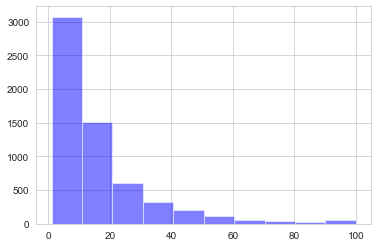

In [9]:
#get distribution of number of orders per customer
sns.set_style('whitegrid')
customerNumOrderFrame = orderDf.groupby("user_id",as_index = False)["order_number"].max()
num_bins = 10
n, bins, patches = plt.hist(customerNumOrderFrame["order_number"] , num_bins, color='blue', alpha=0.5)
mu = customerNumOrderFrame["order_number"].mean()
sigma = customerNumOrderFrame["order_number"].std()

Text(0.5, 1.0, 'Number of Orders per Customer Distribution')

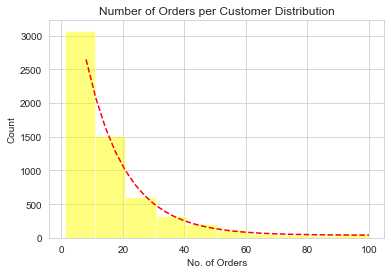

In [10]:
n, bins, patches = plt.hist(customerNumOrderFrame["order_number"] , num_bins, facecolor='yellow', alpha=0.5)

bins = np.delete(bins,10) #to make dimensions of x & y axis values equal
bins = bins+5 #to ge the central value of each bar

def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c

popt, pcov = curve_fit(exponenial_func, bins, n, p0=(1, 1e-6, 1))

xx = np.linspace(8, 100, 30)
yy = exponenial_func(xx, *popt)

plt.plot(xx, yy ,'r--')
plt.xlabel("No. of Orders")
plt.ylabel("Count")
plt.title("Number of Orders per Customer Distribution")

In [12]:
priorDf = pd.read_csv("C:/Users/shiv/MARKET BASKET ANALYSIS/Data/order_products__prior.csv")
trainDf = trainDf.append(priorDf,ignore_index = True)
#Now a product count data frame can be created by counting the order_id for each product_id
productCountDf = trainDf.groupby("product_id",as_index = False)["order_id"].count()

In [13]:
productCountDf.shape

(21927, 2)

In [14]:
#Top 20 most frequently purchased products
topLev = 20

#Here order_id is the count so we need to sort the data frame w.r.t order_id
productCountDf = productCountDf.sort_values("order_id",ascending = False)

topProdFrame = productCountDf.iloc[0:topLev,:]
topProdFrame = topProdFrame.merge(productDf,on = "product_id")

display(topProdFrame.loc[:,["product_name"]])

,product_name
0,Banana
1,Bag of Organic Bananas
2,Organic Strawberries
3,Organic Baby Spinach
4,Organic Hass Avocado
5,Organic Avocado
6,Large Lemon
7,Strawberries
8,Limes
9,Organic Raspberries


Text(0, 0.5, 'Density')

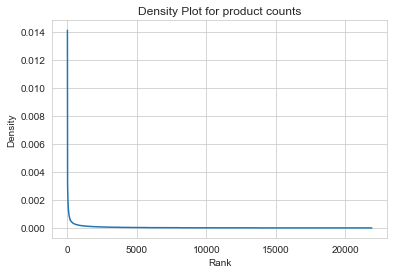

In [15]:
#Calculate the density
productCountDf["density"] = (productCountDf["order_id"]/np.sum(productCountDf["order_id"]))
#Calculate the rank
productCountDf["rank"] = range(productCountDf.shape[0])
plt.plot(productCountDf["rank"],productCountDf["density"])
plt.title("Density Plot for product counts")
plt.xlabel("Rank")
plt.ylabel("Density")

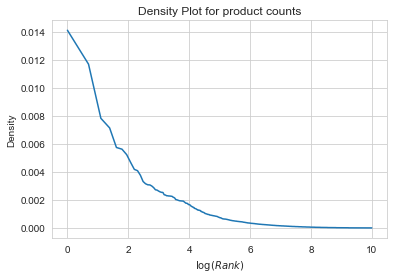

In [16]:
#Calculate log(Rank) also we add 1 to avoid log(0)
productCountDf["logRank"] = np.log(productCountDf["rank"] + 1) 
plt.title("Density Plot for product counts")
plt.xlabel("$\log(Rank)$")
plt.ylabel("Density")
plt.plot(productCountDf["logRank"],productCountDf["density"])

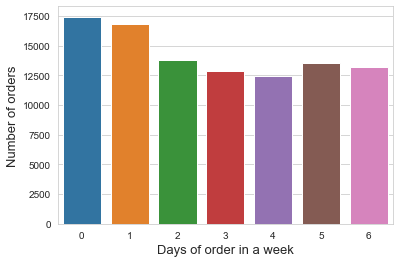

In [17]:
grouped = orderDf.groupby("order_id")["order_dow"].aggregate("sum").reset_index()
grouped = grouped.order_dow.value_counts()

sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of orders', fontsize=13)
plt.xlabel('Days of order in a week', fontsize=13)
plt.show()


In [18]:
len(set(orderDf.user_id))

6045